# FedAVG using IID Data
The clients have different types of MRI images covering specific part of a brain. 

Client 1: 

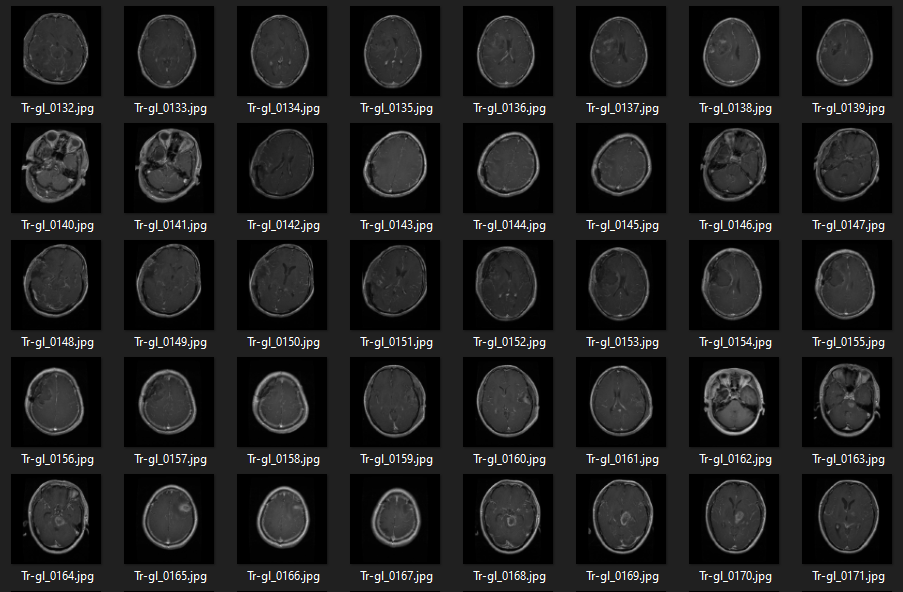

Client 9:

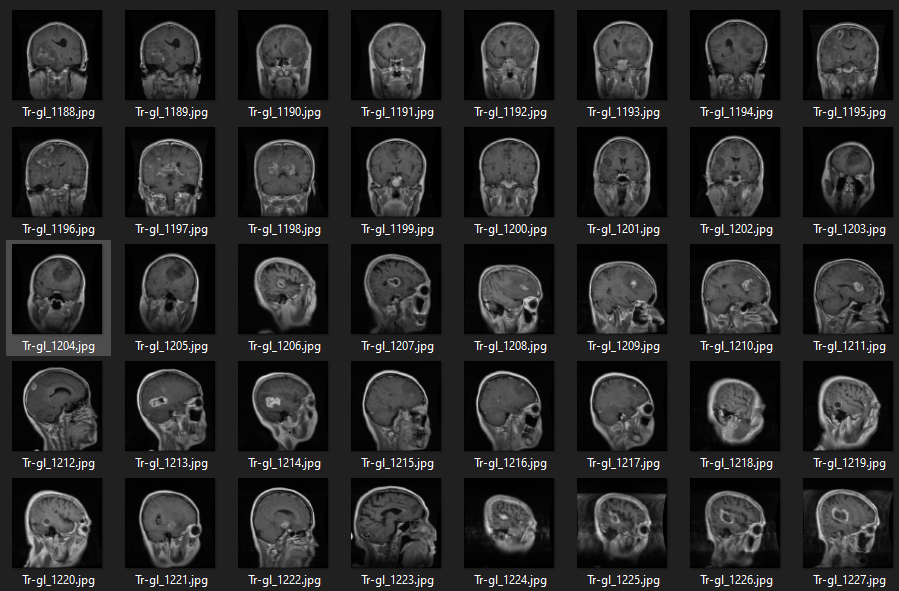

In [1]:
import torch
from torch.utils.data import random_split, DataLoader
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

#!pip install torchsummary
#from torchsummary import summary

from torchvision.datasets import ImageFolder
from torch.utils.data import random_split
from torch.utils.data import RandomSampler

import hashlib
import time

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.Grayscale(),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 5)),
    transforms.transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

test_transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.Grayscale(),
    transforms.transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])

In [3]:
client_0_data = ImageFolder(root = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_0', transform = transform)
client_1_data = ImageFolder(root = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_1', transform = transform)
client_2_data = ImageFolder(root = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_2', transform = transform)
client_3_data = ImageFolder(root = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_3', transform = transform)
client_4_data = ImageFolder(root = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_4', transform = transform)
client_5_data = ImageFolder(root = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_5', transform = transform)
client_6_data = ImageFolder(root = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_6', transform = transform)
client_7_data = ImageFolder(root = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_7', transform = transform)
client_8_data = ImageFolder(root = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_8', transform = transform)
client_9_data = ImageFolder(root = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_9', transform = transform)

In [4]:
global_test = ImageFolder(root = '/kaggle/input/fl-mri-iid/iid-dataset/Testing', transform = test_transform)

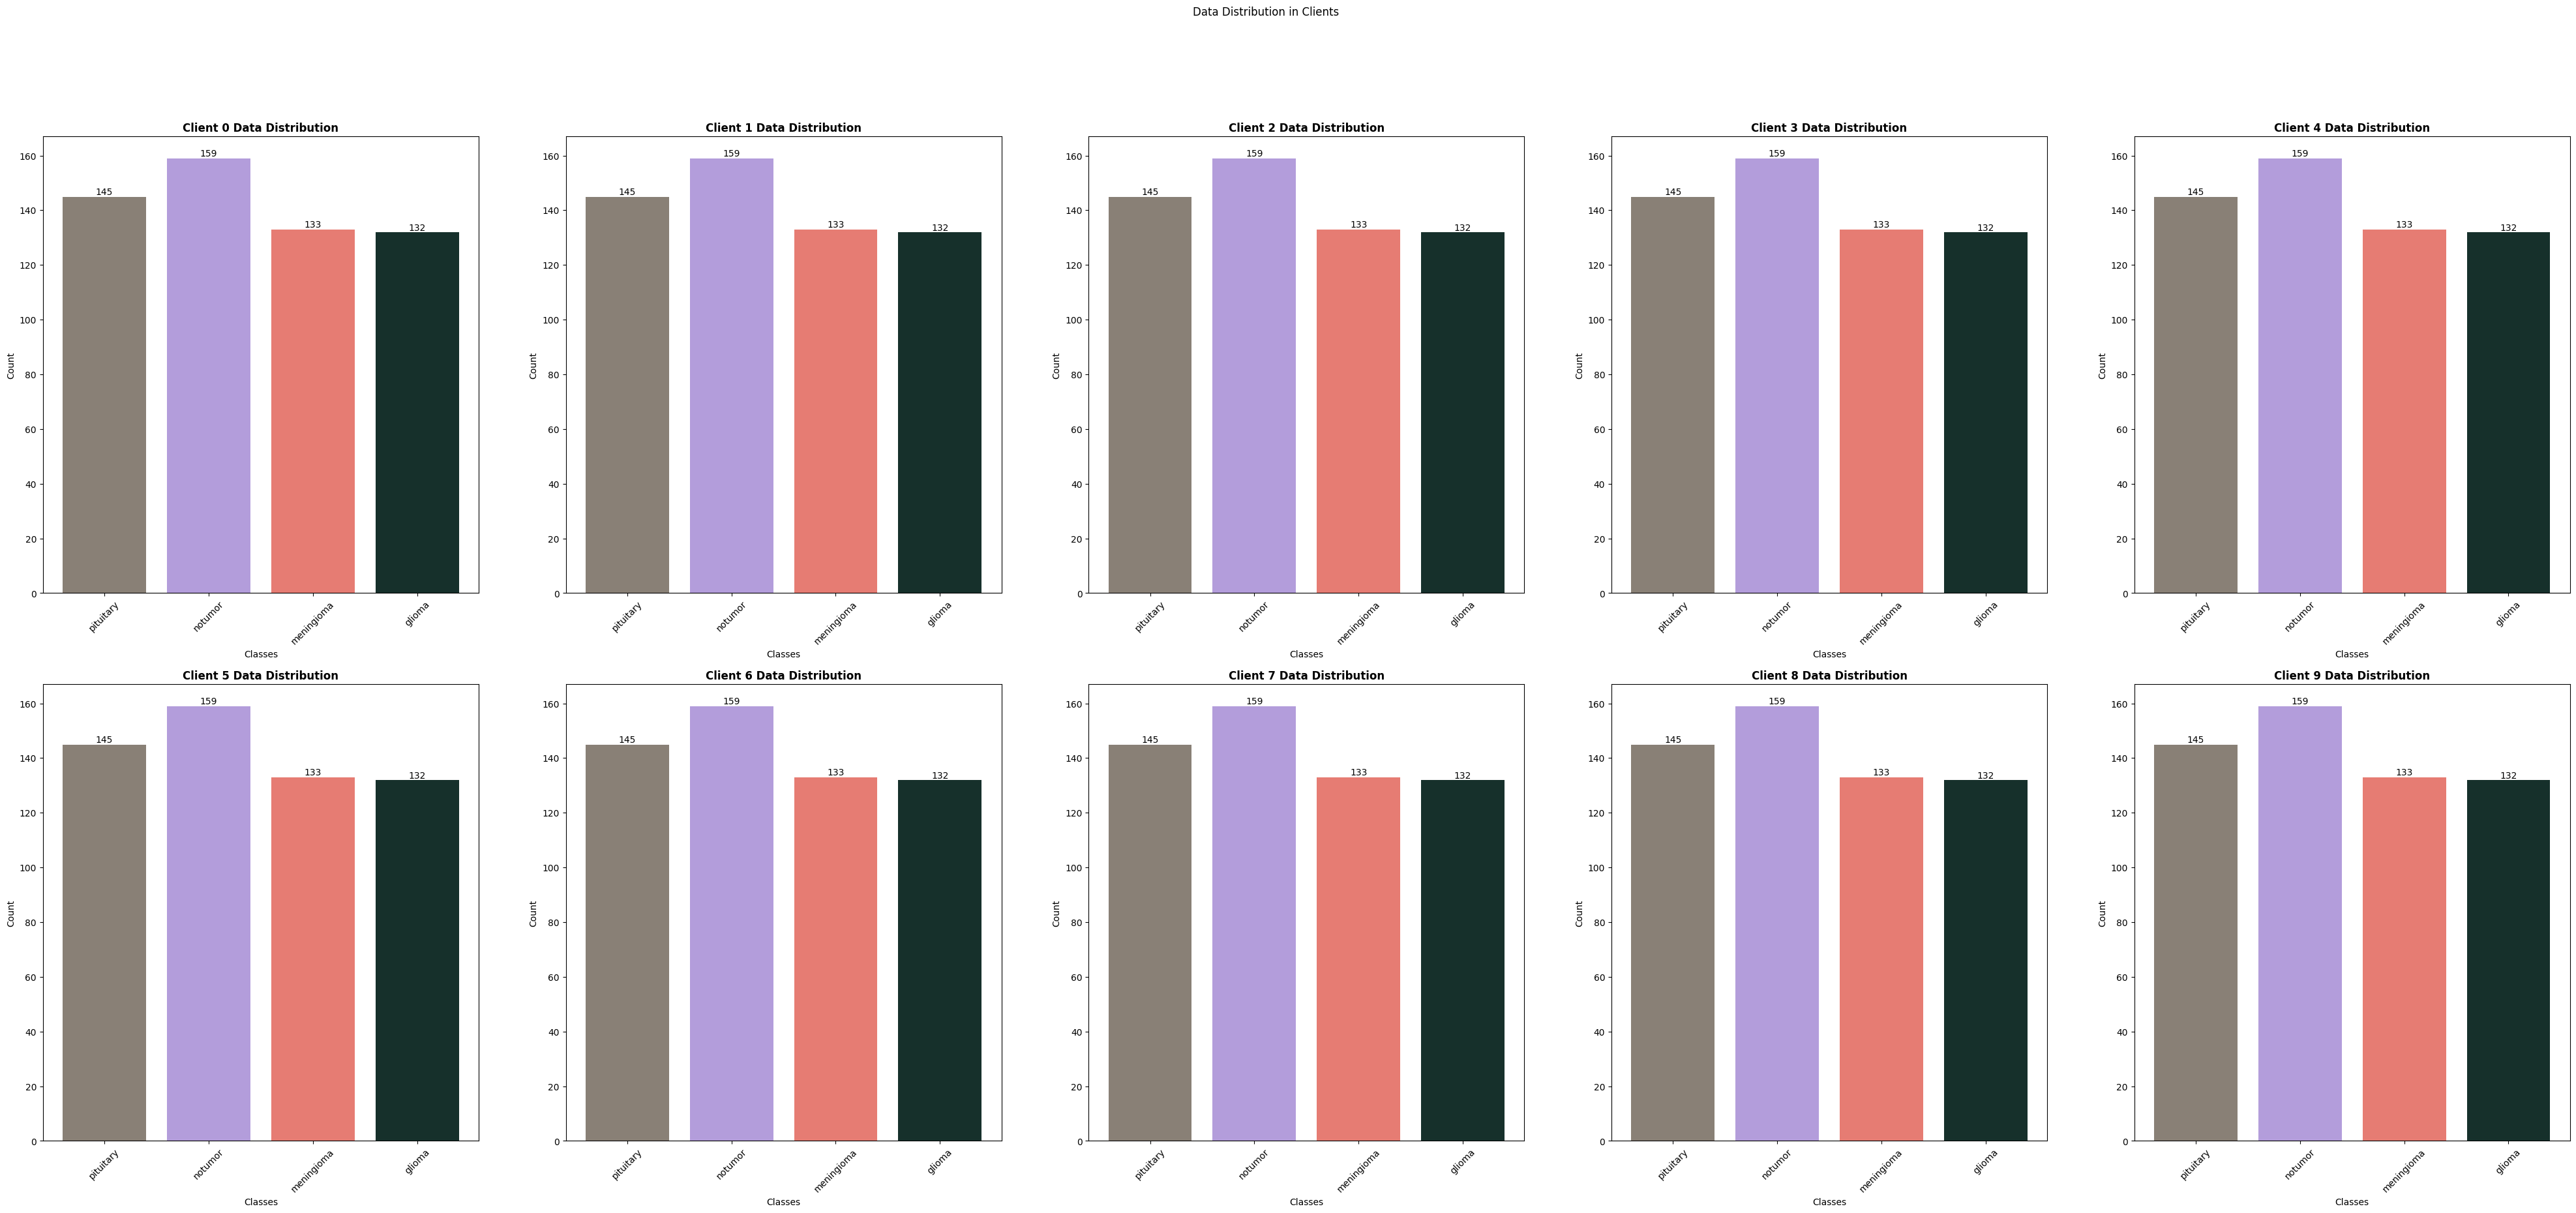

In [5]:
plt.figure(figsize=(50,20))

#Client-0
root_dir = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_0'

# Get a list of subdirectories (folders) within the root directory
subdirectories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

# Count the number of images in each folder
image_counts = {}
for folder in subdirectories:
    folder_path = os.path.join(root_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]  # Adjust the file extension as needed
    image_counts[folder] = len(image_files)

# Convert the counts to lists for plotting
folders, counts = list(image_counts.keys()), list(image_counts.values())

bar_color = ['#898076', '#B39DDB', '#E67C73', '#16302b']

# Create a bar chart

plt.subplot(2, 5, 1) # Adjust the figure size if needed
plt.bar(folders, counts, color = bar_color)
plt.title('Client 0 Data Distribution', fontweight = 'bold')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
# Display the data count above each bar
for folder, count in zip(folders, counts):
    plt.text(folder, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate folder names for readability

##############################

#Client-1
root_dir = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_1'

# Get a list of subdirectories (folders) within the root directory
subdirectories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

# Count the number of images in each folder
image_counts = {}
for folder in subdirectories:
    folder_path = os.path.join(root_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]  # Adjust the file extension as needed
    image_counts[folder] = len(image_files)

# Convert the counts to lists for plotting
folders, counts = list(image_counts.keys()), list(image_counts.values())

bar_color = ['#898076', '#B39DDB', '#E67C73', '#16302b']

# Create a bar chart

plt.subplot(2, 5, 2)  # Adjust the figure size if needed
plt.bar(folders, counts, color = bar_color)
plt.title('Client 1 Data Distribution', fontweight = 'bold')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
# Display the data count above each bar
for folder, count in zip(folders, counts):
    plt.text(folder, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate folder names for readability


##############################

#Client-2
root_dir = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_2'

# Get a list of subdirectories (folders) within the root directory
subdirectories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

# Count the number of images in each folder
image_counts = {}
for folder in subdirectories:
    folder_path = os.path.join(root_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]  # Adjust the file extension as needed
    image_counts[folder] = len(image_files)

# Convert the counts to lists for plotting
folders, counts = list(image_counts.keys()), list(image_counts.values())

bar_color = ['#898076', '#B39DDB', '#E67C73', '#16302b']

# Create a bar chart

plt.subplot(2, 5, 3)  # Adjust the figure size if needed
plt.bar(folders, counts, color = bar_color)
plt.title('Client 2 Data Distribution', fontweight = 'bold')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
# Display the data count above each bar
for folder, count in zip(folders, counts):
    plt.text(folder, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate folder names for readability


##############################

#Client-3
root_dir = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_3'

# Get a list of subdirectories (folders) within the root directory
subdirectories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

# Count the number of images in each folder
image_counts = {}
for folder in subdirectories:
    folder_path = os.path.join(root_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]  # Adjust the file extension as needed
    image_counts[folder] = len(image_files)

# Convert the counts to lists for plotting
folders, counts = list(image_counts.keys()), list(image_counts.values())

bar_color = ['#898076', '#B39DDB', '#E67C73', '#16302b']

# Create a bar chart

plt.subplot(2, 5, 4) # Adjust the figure size if needed
plt.bar(folders, counts, color = bar_color)
plt.title('Client 3 Data Distribution', fontweight = 'bold')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
# Display the data count above each bar
for folder, count in zip(folders, counts):
    plt.text(folder, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate folder names for readability


##############################

#Client-4
root_dir = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_4'

# Get a list of subdirectories (folders) within the root directory
subdirectories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

# Count the number of images in each folder
image_counts = {}
for folder in subdirectories:
    folder_path = os.path.join(root_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]  # Adjust the file extension as needed
    image_counts[folder] = len(image_files)

# Convert the counts to lists for plotting
folders, counts = list(image_counts.keys()), list(image_counts.values())

bar_color = ['#898076', '#B39DDB', '#E67C73', '#16302b']

# Create a bar chart

plt.subplot(2, 5, 5)  # Adjust the figure size if needed
plt.bar(folders, counts, color = bar_color)
plt.title('Client 4 Data Distribution', fontweight = 'bold')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
# Display the data count above each bar
for folder, count in zip(folders, counts):
    plt.text(folder, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate folder names for readability


##############################

#Client-5
root_dir = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_5'

# Get a list of subdirectories (folders) within the root directory
subdirectories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

# Count the number of images in each folder
image_counts = {}
for folder in subdirectories:
    folder_path = os.path.join(root_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]  # Adjust the file extension as needed
    image_counts[folder] = len(image_files)

# Convert the counts to lists for plotting
folders, counts = list(image_counts.keys()), list(image_counts.values())

bar_color = ['#898076', '#B39DDB', '#E67C73', '#16302b']

# Create a bar chart

plt.subplot(2, 5, 6) # Adjust the figure size if needed
plt.bar(folders, counts, color = bar_color)
plt.title('Client 5 Data Distribution', fontweight = 'bold')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
# Display the data count above each bar
for folder, count in zip(folders, counts):
    plt.text(folder, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate folder names for readability


##############################

#Client-6
root_dir = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_6'

# Get a list of subdirectories (folders) within the root directory
subdirectories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

# Count the number of images in each folder
image_counts = {}
for folder in subdirectories:
    folder_path = os.path.join(root_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]  # Adjust the file extension as needed
    image_counts[folder] = len(image_files)

# Convert the counts to lists for plotting
folders, counts = list(image_counts.keys()), list(image_counts.values())

bar_color = ['#898076', '#B39DDB', '#E67C73', '#16302b']

# Create a bar chart

plt.subplot(2, 5, 7) # Adjust the figure size if needed
plt.bar(folders, counts, color = bar_color)
plt.title('Client 6 Data Distribution', fontweight = 'bold')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
# Display the data count above each bar
for folder, count in zip(folders, counts):
    plt.text(folder, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate folder names for readability


##############################

#Client-7
root_dir = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_7'

# Get a list of subdirectories (folders) within the root directory
subdirectories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

# Count the number of images in each folder
image_counts = {}
for folder in subdirectories:
    folder_path = os.path.join(root_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]  # Adjust the file extension as needed
    image_counts[folder] = len(image_files)

# Convert the counts to lists for plotting
folders, counts = list(image_counts.keys()), list(image_counts.values())

bar_color = ['#898076', '#B39DDB', '#E67C73', '#16302b']

# Create a bar chart

plt.subplot(2, 5, 8)  # Adjust the figure size if needed
plt.bar(folders, counts, color = bar_color)
plt.title('Client 7 Data Distribution', fontweight = 'bold')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
# Display the data count above each bar
for folder, count in zip(folders, counts):
    plt.text(folder, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate folder names for readability


##############################

#Client-8
root_dir = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_8'

# Get a list of subdirectories (folders) within the root directory
subdirectories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

# Count the number of images in each folder
image_counts = {}
for folder in subdirectories:
    folder_path = os.path.join(root_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]  # Adjust the file extension as needed
    image_counts[folder] = len(image_files)

# Convert the counts to lists for plotting
folders, counts = list(image_counts.keys()), list(image_counts.values())

bar_color = ['#898076', '#B39DDB', '#E67C73', '#16302b']

# Create a bar chart

plt.subplot(2, 5, 9)  # Adjust the figure size if needed
plt.bar(folders, counts, color = bar_color)
plt.title('Client 8 Data Distribution', fontweight = 'bold')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
# Display the data count above each bar
for folder, count in zip(folders, counts):
    plt.text(folder, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate folder names for readability


##############################

#Client-9
root_dir = '/kaggle/input/fl-mri-iid/iid-dataset/Train/Client_9'

# Get a list of subdirectories (folders) within the root directory
subdirectories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]

# Count the number of images in each folder
image_counts = {}
for folder in subdirectories:
    folder_path = os.path.join(root_dir, folder)
    image_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]  # Adjust the file extension as needed
    image_counts[folder] = len(image_files)

# Convert the counts to lists for plotting
folders, counts = list(image_counts.keys()), list(image_counts.values())

bar_color = ['#898076', '#B39DDB', '#E67C73', '#16302b']

# Create a bar chart
plt.subplot(2, 5, 10)  # Adjust the figure size if needed
plt.bar(folders, counts, color = bar_color)
plt.title('Client 9 Data Distribution', fontweight = 'bold')
plt.xlabel('Classes')
plt.ylabel('Count')
plt.grid(False)
# Display the data count above each bar
for folder, count in zip(folders, counts):
    plt.text(folder, count, str(count), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=45)  # Rotate folder names for readability



##############################
plt.suptitle("Data Distribution in Clients")
plt.show()

In [6]:
classes = 4
input_dim = 65536

rounds = 50
batch_size = 32
epochs_per_client = 5
learning_rate = 1e-2

In [7]:
def get_device():
    return torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

def to_device(data, device):
    if isinstance(data, (list, tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader(DataLoader):
        def __init__(self, dl, device):
            self.dl = dl
            self.device = device

        def __iter__(self):
            for batch in self.dl:
                yield to_device(batch, self.device)

        def __len__(self):
            return len(self.dl)

device = get_device()

if torch.cuda.is_available():
    # Get the GPU device name
    device_name = torch.cuda.get_device_name(0)  # 0 is the default GPU index
    print(f'GPU Device Name: {device_name}')
else:
    print('No GPU available.')

GPU Device Name: Tesla P100-PCIE-16GB


In [8]:
class FederatedNet(torch.nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = torch.nn.Conv2d(1, 20, 3)
        self.conv2 = torch.nn.Conv2d(20, 128, 3)
        self.conv3 = torch.nn.Conv2d(128, 256, 3, stride=2)
        self.conv4 = torch.nn.Conv2d(256, 512, 3, stride=2)
        self.maxpool = torch.nn.MaxPool2d(2, 2)
        self.flatten = torch.nn.Flatten()
        self.fc1 = torch.nn.Linear(4608, 1024)
        self.fc2 = torch.nn.Linear(1024, 512)
        self.fc3 = torch.nn.Linear(512, 128)
        self.fc4 = torch.nn.Linear(128, 4)
        self.non_linearity = torch.nn.functional.elu
        self.track_layers = {'conv1': self.conv1,
                             'conv2': self.conv2,
                             'conv3': self.conv3,
                             'conv4': self.conv4,
                             'fc1': self.fc1,
                             'fc2': self.fc2,
                             'fc3': self.fc3,
                             'fc4': self.fc4,
                             }

    def forward(self, x_batch):

        out = self.conv1(x_batch)
        out = self.non_linearity(out)
        out = self.maxpool(out)
        out = self.conv2(out)
        out = self.non_linearity(out)
        out = self.maxpool(out)
        out = self.conv3(out)
        out = self.non_linearity(out)
        out = self.maxpool(out)
        out = self.conv4(out)
        out = self.non_linearity(out)
        out = self.maxpool(out)
        out = self.flatten(out)
        out = self.fc1(out)
        out = self.fc2(out)
        out = self.fc3(out)
        out = self.fc4(out)
        return out

    def get_track_layers(self):
        return self.track_layers

    def apply_parameters(self, parameters_dict):
        with torch.no_grad():
            for layer_name in parameters_dict:
                self.track_layers[layer_name].weight.data *= 0
                self.track_layers[layer_name].bias.data *= 0
                self.track_layers[layer_name].weight.data += parameters_dict[layer_name]['weight']
                self.track_layers[layer_name].bias.data += parameters_dict[layer_name]['bias']

    def get_parameters(self):
        parameters_dict = dict()
        for layer_name in self.track_layers:
            parameters_dict[layer_name] = {
                'weight': self.track_layers[layer_name].weight.data,
                'bias': self.track_layers[layer_name].bias.data
            }
        return parameters_dict

    def batch_accuracy(self, outputs, labels):
        with torch.no_grad():
            _, predictions = torch.max(outputs, dim=1)
            return torch.tensor(torch.sum(predictions == labels).item() / len(predictions))

    def _process_batch(self, batch):
        images, labels = batch
        outputs = self(images)
        loss = torch.nn.functional.cross_entropy(outputs, labels)
        accuracy = self.batch_accuracy(outputs, labels)
        return (loss, accuracy)

    def fit(self, dataset, epochs, lr, batch_size=32, opt=torch.optim.SGD):
        dataloader = DeviceDataLoader(DataLoader(dataset, batch_size, shuffle=True), device)
        optimizer = opt(self.parameters(), lr)
        train_history = []
        for epoch in range(epochs):
            losses = []
            accs = []
            for batch in dataloader:
                loss, acc = self._process_batch(batch)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
                loss.detach()
                losses.append(loss)
                accs.append(acc)
            avg_loss = torch.stack(losses).mean().item()
            avg_acc = torch.stack(accs).mean().item()
            train_history.append((avg_loss, avg_acc))
        return train_history

    def evaluate(self, dataset, batch_size=128):
        dataloader = DeviceDataLoader(DataLoader(dataset, batch_size), device)
        test_history = []
        losses = []
        accs = []
        with torch.no_grad():
            for batch in dataloader:
                loss, acc = self._process_batch(batch)
                losses.append(loss)
                accs.append(acc)
        avg_loss = torch.stack(losses).mean().item()
        avg_acc = torch.stack(accs).mean().item()
        test_history.append((avg_loss, avg_acc))
        return test_history

In [9]:
class Client:
    def __init__(self, client_id, dataset):
        self.client_id = client_id
        self.dataset = dataset

    def get_dataset_size(self):
        return len(self.dataset)

    def get_client_id(self):
        return self.client_id

    def train(self, parameters_dict):
        net = to_device(FederatedNet(), device)
        net.apply_parameters(parameters_dict)
        train_history = net.fit(self.dataset, epochs_per_client, learning_rate, batch_size)
        test_history = net.evaluate(global_test)
        print('{}: Training Loss = {}, Training Accuracy = {}, Test Loss = {}, Test Accuracy = {}'.format(self.client_id, 
                                                                                                          round(train_history[-1][0], 4), 
                                                                                                          round(train_history[-1][1], 4),
                                                                                                          round(test_history[-1][0], 4),
                                                                                                          round(test_history[-1][1], 4)))
        
        self.train_acc = round(train_history[-1][1], 4)
        self.train_loss = round(train_history[-1][0], 4)
        self.test_acc = round(test_history[-1][1], 4)
        self.test_loss = round(test_history[-1][0], 4)
        
        
        return net.get_parameters()
    
    def get_accuracy(self):
        return self.train_acc, self.test_acc
    
    def get_loss(self):
        return self.train_loss, self.test_loss

In [10]:
client_datasets = [client_0_data, client_1_data, client_2_data, client_3_data, client_4_data, client_5_data, client_6_data, client_7_data, client_8_data, client_9_data]

In [11]:
num_clients = len(client_datasets)
num_clients

10

In [12]:
total_dataset_size = len(client_0_data) + len(client_1_data) + len(client_2_data) + len(client_3_data) + len(client_4_data) + len(client_5_data) + len(client_6_data) + len(client_7_data) + len(client_8_data) + len(client_9_data)
total_dataset_size

5690

In [13]:
clients = [Client('client_' + str(i), client_datasets[i]) for i in range(len(client_datasets))]

In [14]:
global_net = to_device(FederatedNet(), device)
history = []

In [15]:
client_metrics_acc_train = [[0] * num_clients for _ in range(rounds)]
client_metrics_loss_train = [[0] * num_clients for _ in range(rounds)]

client_metrics_acc_test = [[0] * num_clients for _ in range(rounds)]
client_metrics_loss_test = [[0] * num_clients for _ in range(rounds)]

client_index_map = {client: i for i, client in enumerate(clients)}

In [16]:
for i in range(rounds):
    print('Start Round {} ...'.format(i + 1))
    curr_parameters = global_net.get_parameters()
    '''
    new_parameters = dict([(layer_name, {'weight': 0, 'bias': 0}) for layer_name in curr_parameters])
    weight_hash = dict([(layer_name, {'weight': 0, 'bias': 0}) for layer_name in curr_parameters])
    bias_hash = dict([(layer_name, {'weight': 0, 'bias': 0}) for layer_name in curr_parameters])
    '''
    new_parameters = dict([(layer_name, {'weight': 0, 'bias': 0}) for layer_name in curr_parameters])
    for client in clients:
        client_parameters = client.train(curr_parameters)
        
        client_index = client_index_map[client]
        
        client_metrics_acc_train[i][client_index], client_metrics_acc_test[i][client_index] = client.get_accuracy()
        client_metrics_loss_train[i][client_index], client_metrics_loss_test[i][client_index] = client.get_loss()
        
        weightage  = client.get_dataset_size() / total_dataset_size
        for layer_name in client_parameters:
            new_parameters[layer_name]['weight'] += weightage * client_parameters[layer_name]['weight']
            new_parameters[layer_name]['bias'] += weightage * client_parameters[layer_name]['bias']
    
    #blockchain
    '''
    for layer_name in curr_parameters:
        new_param_w_arr = new_parameters[layer_name]['weight'].cpu().detach().numpy()
        new_param_b_arr = new_parameters[layer_name]['bias'].cpu().detach().numpy()
        new_block_weights = Block(len(blockchain.chain), blockchain.get_latest_block().hash, int(time.time()), new_param_w_arr.tolist(), diff)
        new_block_bias = Block(len(blockchain.chain), blockchain.get_latest_block().hash, int(time.time()), new_param_b_arr.tolist(), diff)
        blockchain.add_block(new_block_weights)
        blockchain.add_block(new_block_bias)
        
        weight_hash[layer_name] = new_block_weights.hash
        bias_hash[layer_name] = new_block_bias.hash
        
        print(f"Model update added with hash: weight - {new_block_weights.hash} and bias - {new_block_bias.hash} for layer: {layer_name}")
        
    
    for block in blockchain.chain:
        for layer_name in curr_parameters:
            if block.hash == weight_hash[layer_name]:
                extracted_local_w = block.data
                extracted_w_arr = np.array(extracted_local_w)
                local_w_tensor = (torch.from_numpy(extracted_w_arr)).to("cuda:0")
                new_parameters[layer_name]['weight'] = local_w_tensor
                
            elif block.hash == bias_hash[layer_name]:
                extracted_local_b = block.data
                extracted_b_arr = np.array(extracted_local_b)
                local_b_tensor = (torch.from_numpy(extracted_b_arr)).to("cuda:0")
                new_parameters[layer_name]['bias'] = local_b_tensor
            else:
                continue
    '''
    #blockchain
    
    
    
    global_net.apply_parameters(new_parameters)

    val_history = global_net.evaluate(global_test)
    dev_loss = val_history[-1][0]
    dev_acc = val_history[-1][1]
    print('After round {}, dev_loss = {}, dev_acc = {}\n'.format(i + 1,
            round(dev_loss, 4), round(dev_acc, 4)))
    history.append((dev_loss, dev_acc))

Start Round 1 ...
client_0: Training Loss = 1.3787, Training Accuracy = 0.4697, Test Loss = 1.3767, Test Accuracy = 0.3083
client_1: Training Loss = 1.3733, Training Accuracy = 0.5785, Test Loss = 1.3733, Test Accuracy = 0.4317
client_2: Training Loss = 1.373, Training Accuracy = 0.6342, Test Loss = 1.3725, Test Accuracy = 0.5285
client_3: Training Loss = 1.3745, Training Accuracy = 0.4493, Test Loss = 1.3728, Test Accuracy = 0.4705
client_4: Training Loss = 1.368, Training Accuracy = 0.4609, Test Loss = 1.3688, Test Accuracy = 0.4601
client_5: Training Loss = 1.3676, Training Accuracy = 0.5467, Test Loss = 1.3688, Test Accuracy = 0.4762
client_6: Training Loss = 1.3805, Training Accuracy = 0.3712, Test Loss = 1.3765, Test Accuracy = 0.4494
client_7: Training Loss = 1.3738, Training Accuracy = 0.3994, Test Loss = 1.373, Test Accuracy = 0.4679
client_8: Training Loss = 1.3712, Training Accuracy = 0.4466, Test Loss = 1.3714, Test Accuracy = 0.467
client_9: Training Loss = 1.377, Training

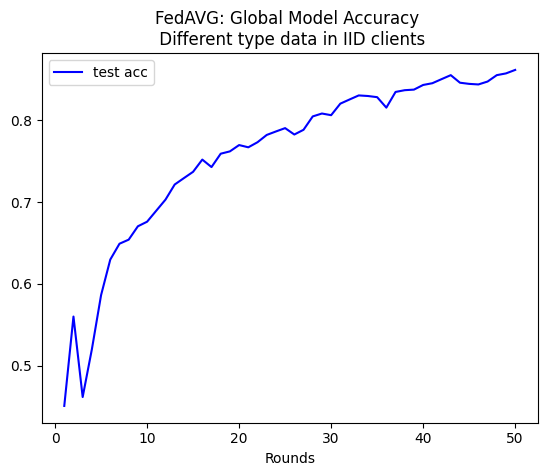

In [17]:
plt.plot([i + 1 for i in range(len(history))], [history[i][1] for i in range(len(history))], color='b', label='test acc')
plt.legend()
plt.title(f'FedAVG: Global Model Accuracy \n Different type data in IID clients')
plt.xlabel('Rounds')
plt.show()

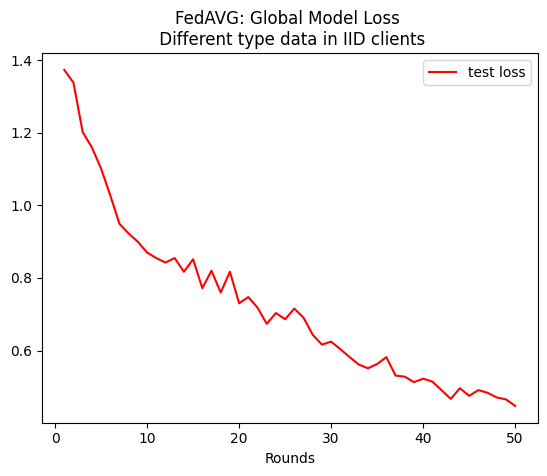

In [18]:
plt.plot([i + 1 for i in range(len(history))], [history[i][0] for i in range(len(history))], color='r', label='test loss')
plt.legend()
plt.title(f'FedAVG: Global Model Loss \n Different type data in IID clients')
plt.xlabel('Rounds')
plt.show()

In [19]:
rounds = len(client_metrics_loss)
num_clients = len(client_metrics_loss[0])

# Plot the accuracy for all clients across rounds
for j in range(num_clients):
    client_accuracies = [client_metrics_loss_train[i][j] for i in range(rounds)]
    plt.plot(range(1, rounds + 1), client_accuracies, label=f'Client {j + 1}')

plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title(f'FedAVG - Client Loss Over Rounds \n Different type data in IID clients')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'client_metrics_loss' is not defined

In [ ]:
rounds = len(client_metrics_acc)
num_clients = len(client_metrics_acc[0])

# Plot the accuracy for all clients across rounds
for j in range(num_clients):
    client_accuracies = [client_metrics_acc_train[i][j] for i in range(rounds)]
    plt.plot(range(1, rounds + 1), client_accuracies, label=f'Client {j + 1}')

plt.xlabel('Round')
plt.ylabel('Accuracy')
plt.title(f'FedAVG - Client Accuracy Over Rounds \n Different type data in IID clients')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
model_scripted = torch.jit.script(global_net) # Export to TorchScript
model_scripted.save('/kaggle/working/model_iid_fed_avg.pth')